### What is Machine Learning ?
- It is a branch of AI that focus on developing models and algorithms that lets computers learn from data without being explicitly programmed for every task.
- In other words, ML teaches the systems to think and understand like humans by learning from data.
### Types of Machine Learning
- There are three types of Machine Learning algorithms.
- They are
- 1. Supervised Learning : Trains models on labeled data to predict (or) classify new, unseen data.
  2. Unsupervised Learning : Finds patterns (or) groups in unlabelled data, like clustering (or) dimensionality reduction.
  3. Reinforcement Learning : Learns through trail and error to maximize rewards, ideals for decision-making tasks.

### Stages of Machine Learning
- ML is a structured process that defines how ML models are deveolped, deployed, and maintained.
- It is a series of steps that ensure the model is accurate, reliable, and scalable.
- 1. Data Collection.
  2. Data Pre-Processing.
  3. Choosing right model.
  4. Training the model.
  5. Evaulating the model.
  6. Hyperparameter Turing and optimization.
  7. Predictions and deployment.

### 1. Data Cleaning
- It is important step.Which involves identify and removing duplicates, irrelevant data, fill empty values etc.
#### Step -1 : Import Libraries and Dataset.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Titanic-Dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Step 2: Check for duplicates
- df.duplicated() - Returns a boolean series indicating duplicate rows.

In [2]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

### Step 3: Identify Column Data Types
- .dtype() - To seperate categorical and numerical values.
- object dtype - Generally used for text (or) categorical values.

In [4]:
Categorical_values = [col for col in df.columns if df[col].dtype == 'object']
Numerical_values = [col for col in df.columns if df[col].dtype != 'object']
print("Categorical Values:\n",Categorical_values)
print("Nummerical Values:\n",Numerical_values)

Categorical Values:
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Nummerical Values:
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


### Step 4: Count Unique Values in the Categorical Columns
- df[numeric_cols].nunique() - Returns count of unique values per column.

In [5]:
df[Categorical_values].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

### Step 5: Calculate Missing Values as Percentage
- df.isnull() - Detects missing values, returning boolean DataFrame.
- Sum missing across columns, normalize by total rows and multiply by 100.

In [7]:
round((df.isnull().sum()/ df.shape[0])*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

### Step 6: Drop Irrelevant or Data-Heavy Missing Columns
- df.drop(columns=[]) - Drop specific columns from the dataframe.
- df.dropna(subset=[]) - Removes rows where specified columns have missing values.
- fillna() - Fills missing values with specified value ( Eg : mean..) 

In [8]:
df1 = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df1.dropna(subset=['Embarked'], inplace=True)
df1['Age'].fillna(df1['Age'].mean(), inplace=True)

C:\Users\techs\AppData\Local\Temp\ipykernel_15876\56642916.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(), inplace=True)


### Step 7: Detect Outliers with Box Plot
- matplotlib.pyplot.boxplot() - Displays distribution of data, highlighting median, quartiles and outliers.
- plt.show() - Renders the plot.

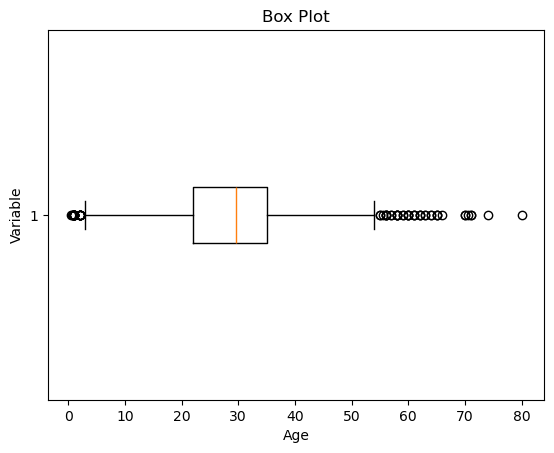

In [11]:
import matplotlib.pyplot as plt

plt.boxplot(df1['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

### Step 8: Calculate Outlier Boundaries and Remove Them
- df['Age'].mean() & df['Age'].std() - Calculate mean and standard deviation.
- Define outlier Detections : 
- 1. Lower_Bound = mean - 2 * std.
- 2. Upper_Bound = mean + 2 * std.
- Filter Dataframe rows within bounds using Boolean indexing.

In [12]:
mean = df1['Age'].mean()
std = df1['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

df2 = df1[(df1['Age'] >= lower_bound) & (df1['Age'] <= upper_bound)]

### Step 9: Impute Missing Data Again if Any
- fillna() - Fills missing data with specified one.

In [13]:
df3 = df2.fillna(df2['Age'].mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Step 10: Recalculate Outlier Bounds and Remove Outliers from the Updated Data

In [14]:
mean = df3['Age'].mean()
std = df3['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)

df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]

Lower Bound : 8.978989004171481
Upper Bound : 49.30395961288911


### Step 11: Data validation and verification
- Data validation and verification - involve ensuring that the data is accurate and consistent by comparing it with external sources or expert knowledge.
- For the machine learning prediction we separate independent and target features.
- Here we will consider only 'Sex' 'Age' 'SibSp', 'Parch' 'Fare' 'Embarked' only as the independent features.
- Survived as target variables because PassengerId will not affect the survival rate.

In [15]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

### Step 12: Data formatting
- It involves converting the data into a standard format or structure that can be easily processed by the algorithms or models used for analysis.
- Here we will discuss commonly used data formatting techniques i.e. Scaling and Normalization.
#### Scaling
- Scaling involves transforming the values of features to a specific range.It maintains the shape of the original distribution while changing the scale.
- It is useful when features have different scales and certain algorithms are sensitive to the magnitude of the features.
- 1.  Min-Max Scaling -  Min-Max scaling rescales the values to a specified range, typically between 0 and 1.It preserves the original distribution and ensures that the minimum value maps to 0 and the maximum value maps to 1.
  2. Standardization (Z-score scaling) - Standardization transforms the values to have a mean of 0 and a standard deviation of 1.
     - Z = (X - μ) / σ
      - Where
     - X = Data
     - μ = Mean value of X
     - σ = Standard deviation of X
     

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

C:\Users\techs\AppData\Local\Temp\ipykernel_15876\1761829158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.0,0.014151,S
1,0.0,female,0.660194,0.125,0.0,0.139136,C
2,1.0,female,0.427184,0.000,0.0,0.015469,S
3,0.0,female,0.601942,0.125,0.0,0.103644,S
4,1.0,male,0.601942,0.000,0.0,0.015713,S
